In [22]:
import numpy as np
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib
import matplotlib.pyplot as plt
import time 
import operator

%matplotlib inline


In [23]:
# 读取文件
train_xy = pd.read_csv("data/train_xy.csv",header=0,sep=",")
train_x = pd.read_csv("data/train_x.csv",header=0,sep=",")
test_all = pd.read_csv("data/test_all.csv",header=0,sep=",")
print(train_xy.shape)
print(train_x.shape)
print(test_all.shape)

(15000, 160)
(10000, 159)
(10000, 159)


In [24]:
train = train_xy.copy()
test = test_all.copy()

In [25]:
train_xy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Columns: 160 entries, cust_id to x_157
dtypes: float64(6), int64(153), object(1)
memory usage: 18.3+ MB


In [26]:
# -----------------------------特征简单信息分析----------------------------------

In [27]:
for feature in train_xy.columns:
    print(feature + '===== '+ str(train_xy[feature].dtype))
''' # 这四个值的重要性很高
x_1===== float64
x_2===== float64
x_80===== float64
x_81===== float64
x_93===== float64
x_95===== float64

其他均为int64---类别型，需要转化为int
'''
pass

cust_id===== int64
cust_group===== object
y===== int64
x_1===== float64
x_2===== float64
x_3===== int64
x_4===== int64
x_5===== int64
x_6===== int64
x_7===== int64
x_8===== int64
x_9===== int64
x_10===== int64
x_11===== int64
x_12===== int64
x_13===== int64
x_14===== int64
x_15===== int64
x_16===== int64
x_17===== int64
x_18===== int64
x_19===== int64
x_20===== int64
x_21===== int64
x_22===== int64
x_23===== int64
x_24===== int64
x_25===== int64
x_26===== int64
x_27===== int64
x_28===== int64
x_29===== int64
x_30===== int64
x_31===== int64
x_32===== int64
x_33===== int64
x_34===== int64
x_35===== int64
x_36===== int64
x_37===== int64
x_38===== int64
x_39===== int64
x_40===== int64
x_41===== int64
x_42===== int64
x_43===== int64
x_44===== int64
x_45===== int64
x_46===== int64
x_47===== int64
x_48===== int64
x_49===== int64
x_50===== int64
x_51===== int64
x_52===== int64
x_53===== int64
x_54===== int64
x_55===== int64
x_56===== int64
x_57===== int64
x_58===== int64
x_59===== int64
x_60==

In [7]:
for feature in train_xy.columns:
    uniq_num = len(train_xy[feature].unique())
    print("Feature(%s) ----- count(%d)" % (feature, uniq_num))
'''
【1】特征变量名称以“x_”开头， 其中，特征变量x1-x95是数值型变量，x96-x157是类别型变量，x变量的缺失值统一以-99表示。
【2】标签变量名称为“y”，0代表低风险客户，1代表高风险客户。
【3】数据集中共包括3个代表不同产品或不同特征的客群信息，客群标示变量名为“cust_group”，不同取值代表不同客群客户。
'''
pass

Feature(cust_id) ----- count(15000)
Feature(cust_group) ----- count(3)
Feature(y) ----- count(2)
Feature(x_1) ----- count(44)
Feature(x_2) ----- count(12409)
Feature(x_3) ----- count(5)
Feature(x_4) ----- count(7)
Feature(x_5) ----- count(5)
Feature(x_6) ----- count(2)
Feature(x_7) ----- count(12)
Feature(x_8) ----- count(11)
Feature(x_9) ----- count(6)
Feature(x_10) ----- count(8)
Feature(x_11) ----- count(6)
Feature(x_12) ----- count(2)
Feature(x_13) ----- count(19)
Feature(x_14) ----- count(16)
Feature(x_15) ----- count(7)
Feature(x_16) ----- count(9)
Feature(x_17) ----- count(6)
Feature(x_18) ----- count(2)
Feature(x_19) ----- count(17)
Feature(x_20) ----- count(13)
Feature(x_21) ----- count(8)
Feature(x_22) ----- count(8)
Feature(x_23) ----- count(2)
Feature(x_24) ----- count(26)
Feature(x_25) ----- count(7)
Feature(x_26) ----- count(10)
Feature(x_27) ----- count(6)
Feature(x_28) ----- count(2)
Feature(x_29) ----- count(25)
Feature(x_30) ----- count(18)
Feature(x_31) ----- count(8

以上形式中，前面的数值型数据的类别较少，我在想可能是经过分箱之后的特征

In [8]:
for feature in train_xy.columns:
    uniq_num = len(train_xy[feature].unique())
    if uniq_num <= 10: # 看看个数为10以下的
        print("Feature(%s) ----- count(%d)" % (feature, uniq_num))

Feature(cust_group) ----- count(3)
Feature(y) ----- count(2)
Feature(x_3) ----- count(5)
Feature(x_4) ----- count(7)
Feature(x_5) ----- count(5)
Feature(x_6) ----- count(2)
Feature(x_9) ----- count(6)
Feature(x_10) ----- count(8)
Feature(x_11) ----- count(6)
Feature(x_12) ----- count(2)
Feature(x_15) ----- count(7)
Feature(x_16) ----- count(9)
Feature(x_17) ----- count(6)
Feature(x_18) ----- count(2)
Feature(x_21) ----- count(8)
Feature(x_22) ----- count(8)
Feature(x_23) ----- count(2)
Feature(x_25) ----- count(7)
Feature(x_26) ----- count(10)
Feature(x_27) ----- count(6)
Feature(x_28) ----- count(2)
Feature(x_31) ----- count(8)
Feature(x_32) ----- count(10)
Feature(x_33) ----- count(7)
Feature(x_34) ----- count(2)
Feature(x_37) ----- count(6)
Feature(x_49) ----- count(6)
Feature(x_61) ----- count(7)
Feature(x_62) ----- count(7)
Feature(x_63) ----- count(7)
Feature(x_70) ----- count(8)
Feature(x_71) ----- count(9)
Feature(x_72) ----- count(10)
Feature(x_73) ----- count(9)
Feature(x_75)

In [9]:
for feature in train_xy.columns:
    uniq_num = len(train_xy[feature].unique())
    if uniq_num > 10: # 看看个数为10以上的
        print("Feature(%s) ----- count(%d)" % (feature, uniq_num))

Feature(cust_id) ----- count(15000)
Feature(x_1) ----- count(44)
Feature(x_2) ----- count(12409)
Feature(x_7) ----- count(12)
Feature(x_8) ----- count(11)
Feature(x_13) ----- count(19)
Feature(x_14) ----- count(16)
Feature(x_19) ----- count(17)
Feature(x_20) ----- count(13)
Feature(x_24) ----- count(26)
Feature(x_29) ----- count(25)
Feature(x_30) ----- count(18)
Feature(x_35) ----- count(39)
Feature(x_36) ----- count(26)
Feature(x_38) ----- count(20)
Feature(x_39) ----- count(12)
Feature(x_40) ----- count(12)
Feature(x_41) ----- count(17)
Feature(x_42) ----- count(17)
Feature(x_43) ----- count(12)
Feature(x_44) ----- count(12)
Feature(x_45) ----- count(12)
Feature(x_46) ----- count(11)
Feature(x_47) ----- count(17)
Feature(x_48) ----- count(11)
Feature(x_50) ----- count(12)
Feature(x_51) ----- count(17)
Feature(x_52) ----- count(17)
Feature(x_53) ----- count(17)
Feature(x_54) ----- count(17)
Feature(x_55) ----- count(17)
Feature(x_56) ----- count(17)
Feature(x_57) ----- count(17)
Featu

In [10]:
for feature in train_xy.columns:
    uniq_num = len(train_xy[feature].unique())
    if uniq_num == 2:  # 只有两个值的特征,可能还包含nan 
        print("Feature(%s) ----- count(%d)" % (feature, uniq_num))

Feature(y) ----- count(2)
Feature(x_6) ----- count(2)
Feature(x_12) ----- count(2)
Feature(x_18) ----- count(2)
Feature(x_23) ----- count(2)
Feature(x_28) ----- count(2)
Feature(x_34) ----- count(2)
Feature(x_92) ----- count(2)
Feature(x_94) ----- count(2)
Feature(x_96) ----- count(2)
Feature(x_102) ----- count(2)
Feature(x_107) ----- count(2)
Feature(x_113) ----- count(2)
Feature(x_114) ----- count(2)
Feature(x_118) ----- count(2)
Feature(x_126) ----- count(2)
Feature(x_131) ----- count(2)
Feature(x_133) ----- count(2)
Feature(x_135) ----- count(2)
Feature(x_137) ----- count(2)
Feature(x_138) ----- count(2)
Feature(x_151) ----- count(2)


In [11]:
for feature in train_xy.columns:
    uniq_num = len(train_xy[feature].unique())
    nan_num = train_xy.loc[train_xy[feature]==-99,:].shape[0]
    if nan_num == 0:
        if uniq_num == 2:  # 只有两个值的特征,Feature(x_96) ----- count(2),缺失率 = 0
            print("Feature(%s) ----- count(%d)" % (feature, uniq_num))

Feature(y) ----- count(2)
Feature(x_96) ----- count(2)


In [12]:
# --------------------------y值的分析--------------------------

In [13]:
# 看看 预测值
train_xy['y'].value_counts()

0    14309
1      691
Name: y, dtype: int64

In [14]:
14309.0 / 691 # 样本极其不均衡？？？20.7 : 1

20.70767004341534

In [15]:
train_xy['cust_group'].value_counts()

group_1    5000
group_2    5000
group_3    5000
Name: cust_group, dtype: int64

In [16]:
test_all['cust_group'].value_counts()

group_3    4000
group_2    3000
group_1    3000
Name: cust_group, dtype: int64

In [17]:
pd.crosstab(train_xy['cust_group'],train_xy['y']) # 不允许用这个特征：cust_group
# 发现group1的 1 类比较多

y,0,1
cust_group,,
group_1,4544,456
group_2,4871,129
group_3,4894,106


从上面可以发现， 在第一组中的 类别更加均衡一些。  大致是一般的三倍。

In [21]:
#展现测试集上不同group的分类情况

In [ ]:
# ----------------------缺失值处理-------------------------

In [7]:
# 看一下缺失值的比例
# 缺失很少的，要不要进行填充呢？？？？？
def get_nan_rate(df,rate = 0.1):
    total_num = df.shape[0]
    df_nan_feats = []
    for i in range(157):
        feat = 'x_' + str(i+1)
        nan_num = df.loc[df[feat]==-99,:].shape[0]
        nan_rate = nan_num / float(total_num) 
        if nan_rate <= rate:
            df_nan_feats.append(feat)
            print("feature:",feat,"nan_num = ",nan_num,"nan_rate = ",nan_rate)
    print("一共有 %d 个特征列的缺失值较少，低于%f "%(len(df_nan_feats),rate))
    return df_nan_feats
train_little_nan_feats = get_nan_rate(train.copy())

feature: x_1 nan_num =  0 nan_rate =  0.0
feature: x_2 nan_num =  0 nan_rate =  0.0
feature: x_39 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_40 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_41 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_42 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_43 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_44 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_45 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_46 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_47 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_48 nan_num =  149 nan_rate =  0.009933333333333334
feature: x_49 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_50 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_51 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_52 nan_num =  128 nan_rate =  0.008533333333333334
feature: x_53 nan_num =  128 nan_rate =  0.00853

In [32]:

# 每一列 ，按照属性来看
def get_most_nan_feat(df,rate = 0.95):
    total_num = df.shape[0]
    df_nan_feats = []
    for i in range(157):
        feat = 'x_' + str(i+1)
        nan_num = df.loc[df[feat]==-99,:].shape[0]
        nan_rate = nan_num / float(total_num) 
        if nan_rate >= rate:
            df_nan_feats.append(feat)
            print("feature:",feat,"nan_num = ",nan_num,"nan_rate = ",nan_rate)
    print("一共有 %d 个特征列的缺失值严重，超过%f "%(len(df_nan_feats),rate))
    return df_nan_feats
train_most_nan_feats = get_most_nan_feat(train.copy())
# x96-x157是类别型变量,可以看出，大部分都是类别信息缺失严重
# 157-96+1=62个，有37个缺失，只剩 62 -37 = 25
# 数值型的只有两个缺失严重。x_92，x_94，刚好他的重要性 = 0

feature: x_92 nan_num =  14979 nan_rate =  0.9986
feature: x_94 nan_num =  14979 nan_rate =  0.9986
feature: x_102 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_103 nan_num =  14996 nan_rate =  0.9997333333333334
feature: x_104 nan_num =  14989 nan_rate =  0.9992666666666666
feature: x_105 nan_num =  14971 nan_rate =  0.9980666666666667
feature: x_106 nan_num =  14989 nan_rate =  0.9992666666666666
feature: x_107 nan_num =  14998 nan_rate =  0.9998666666666667
feature: x_108 nan_num =  14995 nan_rate =  0.9996666666666667
feature: x_109 nan_num =  14996 nan_rate =  0.9997333333333334
feature: x_110 nan_num =  15000 nan_rate =  1.0
feature: x_111 nan_num =  14995 nan_rate =  0.9996666666666667
feature: x_112 nan_num =  15000 nan_rate =  1.0
feature: x_113 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_114 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_115 nan_num =  14997 nan_rate =  0.9998
feature: x_116 nan_num =  15000 nan_rate =  1.0
feature: x_1

In [33]:
print("全部都是nan的特征列")
train_all_nan_feats = get_most_nan_feat(train.copy(),1.0)

全部都是nan的特征列
feature: x_110 nan_num =  15000 nan_rate =  1.0
feature: x_112 nan_num =  15000 nan_rate =  1.0
feature: x_116 nan_num =  15000 nan_rate =  1.0
feature: x_129 nan_num =  15000 nan_rate =  1.0
feature: x_132 nan_num =  15000 nan_rate =  1.0
feature: x_134 nan_num =  15000 nan_rate =  1.0
一共有 6 个特征列的缺失值严重，超过1.000000 


In [34]:
print("nan + 一个别的value的特征")
def get_nan_other_feature(train,rate = 0):
    total_num = train.shape[0]
    train_nan_feats = []
    for i in range(157):
        feat = 'x_' + str(i+1)
        nan_num = train.loc[train[feat]==-99,:].shape[0]
        nan_rate = nan_num / float(total_num) 
        if nan_rate > rate:                    # 有缺失值 nan
            if len(train[feat].unique()) == 2: # 只有nan + 一个其他值
                print("feature:",feat,"nan_num = ",nan_num,"nan_rate = ",nan_rate)
                train_nan_feats.append(feat)

    print("一共有 %d 个特征列的只有nan+其他值。 "%(len(train_nan_feats)))
    return train_nan_feats
train_nan_other_feats = get_nan_other_feature(train.copy(),0)
# 数值型：x_6 ，x_12 ， x_18 ，x_23 ， x_28 ，x_34  ，x_92 ，x_94 

nan + 一个别的value的特征
feature: x_6 nan_num =  7689 nan_rate =  0.5126
feature: x_12 nan_num =  7345 nan_rate =  0.48966666666666664
feature: x_18 nan_num =  7689 nan_rate =  0.5126
feature: x_23 nan_num =  7345 nan_rate =  0.48966666666666664
feature: x_28 nan_num =  7689 nan_rate =  0.5126
feature: x_34 nan_num =  7345 nan_rate =  0.48966666666666664
feature: x_92 nan_num =  14979 nan_rate =  0.9986
feature: x_94 nan_num =  14979 nan_rate =  0.9986
feature: x_102 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_107 nan_num =  14998 nan_rate =  0.9998666666666667
feature: x_113 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_114 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_118 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_126 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_131 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_133 nan_num =  14999 nan_rate =  0.9999333333333333
feature: x_135 nan_num =  14999 nan_rate =  0

In [35]:
other = ['x_10', 'x_11','x_15', 'x_17', 'x_21', 'x_25', 'x_31', 'x_37', 'x_70', 'x_71', 'x_74', 'x_89']
for i in other:
    print("********** "+i+" *********")
    print(train_xy[i].value_counts())
    

********** x_10 *********
-99    7345
 0     6141
 1     1198
 2      249
 3       58
 4        5
 5        3
 6        1
Name: x_10, dtype: int64
********** x_11 *********
-99    7345
 0     6141
 1     1306
 2      180
 3       26
 4        2
Name: x_11, dtype: int64
********** x_15 *********
-99    7689
 0     7207
 1       95
 2        5
 3        2
 4        1
 8        1
Name: x_15, dtype: int64
********** x_17 *********
-99    7689
 0     5519
 1     1564
 2      201
 3       26
 4        1
Name: x_17, dtype: int64
********** x_21 *********
 0     7542
-99    7345
 1      102
 2        6
 4        2
 6        1
 5        1
 3        1
Name: x_21, dtype: int64
********** x_25 *********
-99    7689
 0     7207
 1       95
 2        5
 3        2
 4        1
 8        1
Name: x_25, dtype: int64
********** x_31 *********
 0     7542
-99    7345
 1      102
 2        6
 4        2
 6        1
 5        1
 3        1
Name: x_31, dtype: int64
********** x_37 *********
-99    7345
 0   

In [ ]:
# ----------------------------------每个样本缺失值的个数统计--------------------------------------------

In [12]:
a = train.replace(-99,np.nan).copy()
a.shape

(15000, 160)

In [13]:
a["nan_num"] = a.shape[1] - a.count(axis = 1).values # 列数 - 非nan的数量
a.head()

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157,nan_num
0,110000,group_3,0,0.354167,0.604988,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,NaN,76
1,110001,group_3,0,0.125000,0.012058,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,75
2,110002,group_3,0,0.333333,0.565979,0.0,0.0,0.0,0.0,0.0,...,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,2.0,40
3,110003,group_3,0,0.208333,0.316209,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,4.0,39
4,110004,group_3,0,0.208333,0.008061,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,57


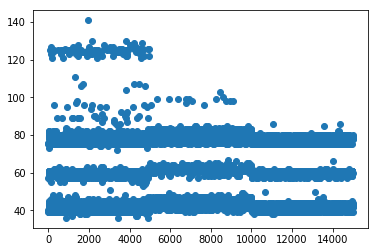

In [14]:
plt.scatter(a.index.values,a['nan_num'])  # group3:1-5000， group1:5001-10000, group2: 10001-15000
# 可以看出，group3的用户缺失较为严重一些

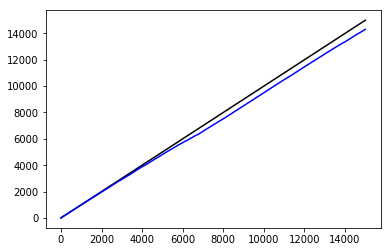

In [21]:
# 统计一下负样本的累计和
aa = a.sort_values(by = 'nan_num')
aa['y'] = aa['y'].map({0:1,1:0})
plt.plot(range(15000),range(15000),color = 'black') # 直线

plt.plot(range(15000),aa['y'].cumsum(),color = 'blue') # 负样本的累计和：14309（0：低风险， 1：高风险）

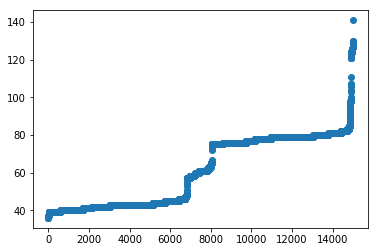

In [23]:
# 排个序看看
plt.scatter(range(15000),a['nan_num'].sort_values().values)
plt.scatter(range(15000),a['nan_num'].sort_values().values)

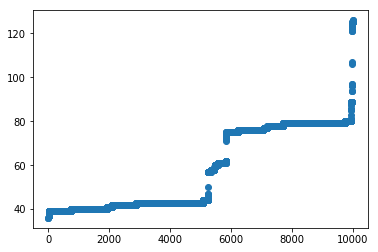

In [24]:
# 看看test集合的
b = test.replace(-99,np.nan).copy()
b["nan_num"] = b.shape[1] - b.count(axis = 1).values # 列数 - 非nan的数量
plt.scatter(range(10000),b['nan_num'].sort_values().values)

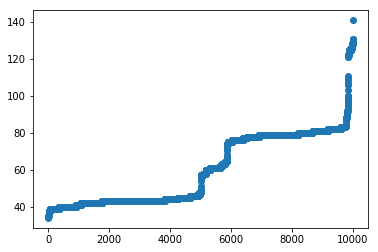

In [25]:
# 看看test集合的
c = train_x.replace(-99,np.nan).copy()
c["nan_num"] = c.shape[1] - c.count(axis = 1).values # 列数 - 非nan的数量
plt.scatter(range(10000),c['nan_num'].sort_values().values)

In [26]:
abc = pd.DataFrame()
abc['a'] = a["nan_num"] # train_xy
abc['b'] = b["nan_num"] # test
abc['c'] = c["nan_num"] # train_x
abc.describe() # a和c 的分布很接近哦

,a,b,c
count,15000.000000,10000.000000,10000.000000
mean,60.892667,57.901700,60.117300
std,18.157714,17.938975,19.292023
min,36.000000,36.000000,34.000000
25%,43.000000,42.000000,43.000000
50%,61.000000,43.000000,48.500000
75%,79.000000,78.000000,79.000000
max,141.000000,126.000000,141.000000


In [30]:
b.loc[b["nan_num"]>120,["nan_num"]].shape # 大于120的有28个，最大值126（test set）

(28, 1)

In [35]:
a.loc[a["nan_num"]>120,['y']].shape # 大于120的有94个

(94, 1)

In [37]:
a.loc[a["nan_num"]>120,['nan_num','y']] # 看看 y =1的对应的缺失值

,nan_num,y
61,125,0
103,123,0
124,127,0
153,121,0
164,125,0
208,124,0
296,125,0
477,125,0
603,125,0
636,123,0


In [33]:
a.loc[a["nan_num"]>120,['y']].sum() # train 大于 120的之后3个

y    3
dtype: int64

In [34]:
a.loc[a["nan_num"]>126,['y']].sum() # 有十四个样本缺失过多，但是都是0，157*0.8 = 125.6# 所以离散化试试

y    0
dtype: int64

In [ ]:
# ------------------------------------看看重复的特征列-----------------------------

In [11]:
def get_same_feat(df):
    a = df.corr() # 计算特征列的相关性矩阵
    feat = a.columns.tolist()
    same_feat = []
    num = len(feat)
    for i in range(num):
        for j in range(i+1,num): # 右上角
            if a.iloc[i,j] ==1:  # 相关性一致
                print(feat[i] + " == " + feat[j])
                same_feat.append(feat[j]) # 重复的
    print("重复的特征：",len(set(same_feat)))
    return list(set(same_feat))
train_same_feat = get_same_feat(train)
print(train_same_feat)
test_sanme_feat = get_same_feat(test)
print(test_sanme_feat)

x_6 == x_18
x_6 == x_28
x_12 == x_23
x_12 == x_34
x_15 == x_25
x_18 == x_28
x_21 == x_31
x_23 == x_34
x_92 == x_94
x_108 == x_111
x_126 == x_138
重复的特征： 9
['x_23', 'x_111', 'x_18', 'x_94', 'x_31', 'x_34', 'x_28', 'x_138', 'x_25']
x_6 == x_18
x_6 == x_28
x_12 == x_23
x_12 == x_34
x_18 == x_28
x_23 == x_34
x_107 == x_116
x_108 == x_111
重复的特征： 6
['x_23', 'x_111', 'x_116', 'x_18', 'x_34', 'x_28']


In [16]:
# 检测一下
same = ['x_6','x_18','x_28']
train[same].describe()

,x_6,x_18,x_28
count,15000.00000,15000.00000,15000.00000
mean,-50.74740,-50.74740,-50.74740
std,49.48593,49.48593,49.48593
min,-99.00000,-99.00000,-99.00000
25%,-99.00000,-99.00000,-99.00000
50%,-99.00000,-99.00000,-99.00000
75%,0.00000,0.00000,0.00000
max,0.00000,0.00000,0.00000


In [17]:
same = ['x_12','x_23','x_34']
train[same].describe()

,x_12,x_23,x_34
count,15000.000000,15000.000000,15000.000000
mean,-48.477000,-48.477000,-48.477000
std,49.491078,49.491078,49.491078
min,-99.000000,-99.000000,-99.000000
25%,-99.000000,-99.000000,-99.000000
50%,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000
max,0.000000,0.000000,0.000000


In [18]:
same = ['x_15','x_25']
train[same].describe()

,x_15,x_25
count,15000.000000,15000.000000
mean,-50.739200,-50.739200
std,49.494481,49.494481
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,-99.000000,-99.000000
75%,0.000000,0.000000
max,8.000000,8.000000


In [19]:
same = ['x_21','x_31']
train[same].describe()

,x_21,x_31
count,15000.000000,15000.000000
mean,-48.467933,-48.467933
std,49.500111,49.500111
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,6.000000,6.000000


In [20]:
same = ['x_92','x_94']
train[same].describe()

,x_92,x_94
count,15000.00000,15000.00000
mean,-98.86140,-98.86140
std,3.70177,3.70177
min,-99.00000,-99.00000
25%,-99.00000,-99.00000
50%,-99.00000,-99.00000
75%,-99.00000,-99.00000
max,0.00000,0.00000


In [23]:
same = ['x_108','x_111']
train[same].describe()

,x_108,x_111
count,15000.000000,15000.000000
mean,-98.966533,-98.966533
std,1.832859,1.832859
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,-99.000000,-99.000000
75%,-99.000000,-99.000000
max,2.000000,2.000000


In [22]:
same = ['x_126','x_138']
train[same].describe()

,x_126,x_138
count,15000.000000,15000.000000
mean,-98.993333,-98.993333
std,0.816497,0.816497
min,-99.000000,-99.000000
25%,-99.000000,-99.000000
50%,-99.000000,-99.000000
75%,-99.000000,-99.000000
max,1.000000,1.000000


In [ ]:
#-----------------------------------观察一些特征------------------------------------------

In [29]:
# 对一些只有两三个值的特征，观看一下
print("看看只有一两个值的特征")
one_value_feats = []
for feature in train_xy.columns:
    uniq_num = len(train_xy[feature].unique())
    if uniq_num <=2:
        if feature == 'y':
            continue
        print("Feature(%s) ----- count(%d)" % (feature, uniq_num))
        one_value_feats.append(feature)
# 特征变量x1-x95是数值型变量，x96-x157是类别型变量，x变量的缺失值统一以-99表示。

看看只有一两个值的特征
Feature(x_6) ----- count(2)
Feature(x_12) ----- count(2)
Feature(x_18) ----- count(2)
Feature(x_23) ----- count(2)
Feature(x_28) ----- count(2)
Feature(x_34) ----- count(2)
Feature(x_92) ----- count(2)
Feature(x_94) ----- count(2)
Feature(x_96) ----- count(2)
Feature(x_102) ----- count(2)
Feature(x_107) ----- count(2)
Feature(x_110) ----- count(1)
Feature(x_112) ----- count(1)
Feature(x_113) ----- count(2)
Feature(x_114) ----- count(2)
Feature(x_116) ----- count(1)
Feature(x_118) ----- count(2)
Feature(x_126) ----- count(2)
Feature(x_129) ----- count(1)
Feature(x_131) ----- count(2)
Feature(x_132) ----- count(1)
Feature(x_133) ----- count(2)
Feature(x_134) ----- count(1)
Feature(x_135) ----- count(2)
Feature(x_137) ----- count(2)
Feature(x_138) ----- count(2)
Feature(x_151) ----- count(2)


In [31]:
len(one_value_feats)

27

****************************************************
x_6
-99    7689
 0     7311
Name: x_6, dtype: int64
y       0    1
x_6           
-99  7455  234
 0   6854  457


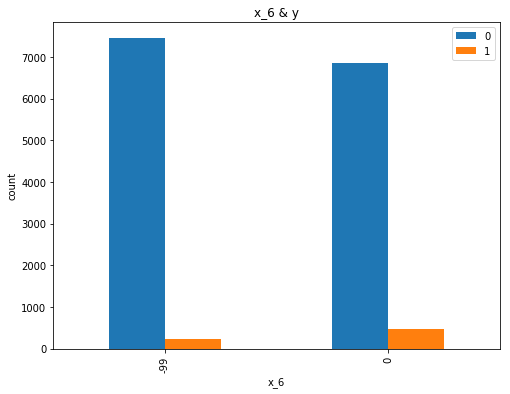

****************************************************
x_12
 0     7655
-99    7345
Name: x_12, dtype: int64
y        0    1
x_12           
-99   7126  219
 0    7183  472


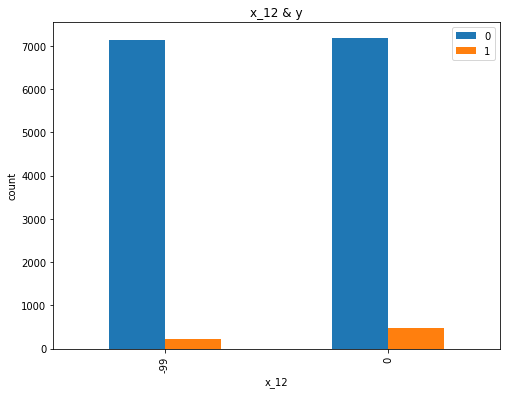

****************************************************
x_18
-99    7689
 0     7311
Name: x_18, dtype: int64
y        0    1
x_18           
-99   7455  234
 0    6854  457


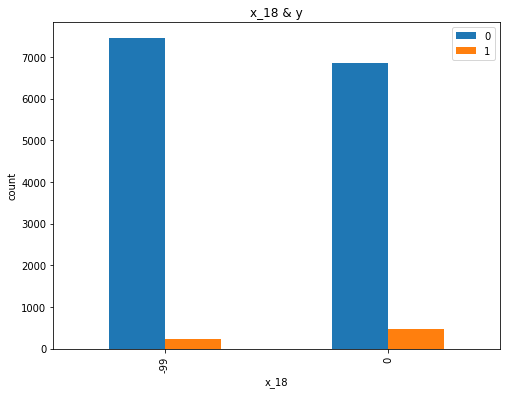

****************************************************
x_23
 0     7655
-99    7345
Name: x_23, dtype: int64
y        0    1
x_23           
-99   7126  219
 0    7183  472


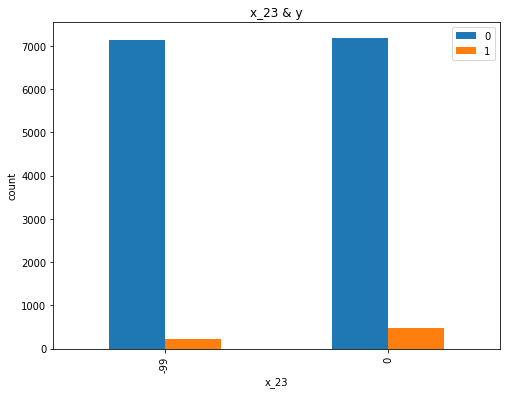

****************************************************
x_28
-99    7689
 0     7311
Name: x_28, dtype: int64
y        0    1
x_28           
-99   7455  234
 0    6854  457


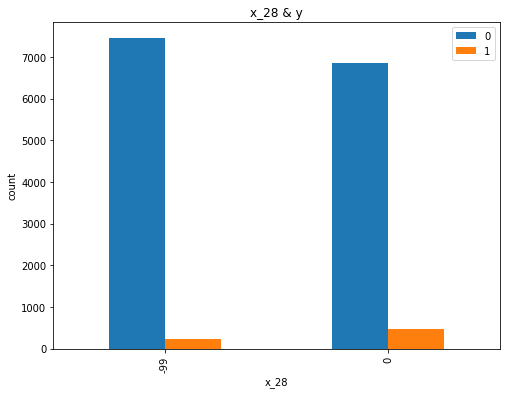

****************************************************
x_34
 0     7655
-99    7345
Name: x_34, dtype: int64
y        0    1
x_34           
-99   7126  219
 0    7183  472


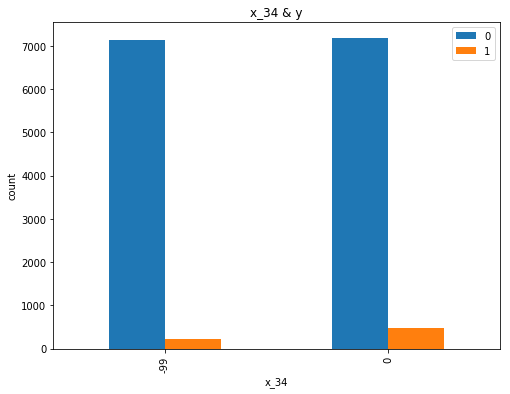

****************************************************
x_92
-99    14979
 0        21
Name: x_92, dtype: int64
y         0    1
x_92            
-99   14288  691
 0       21    0


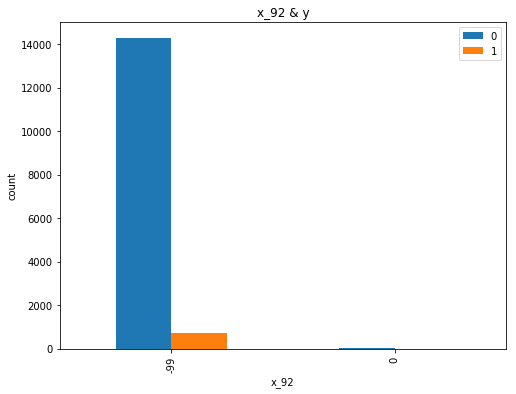

****************************************************
x_94
-99    14979
 0        21
Name: x_94, dtype: int64
y         0    1
x_94            
-99   14288  691
 0       21    0


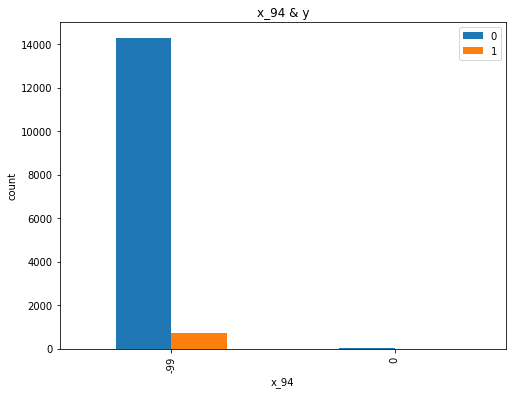

****************************************************
x_96
1    10572
2     4428
Name: x_96, dtype: int64
y         0    1
x_96            
1     10062  510
2      4247  181


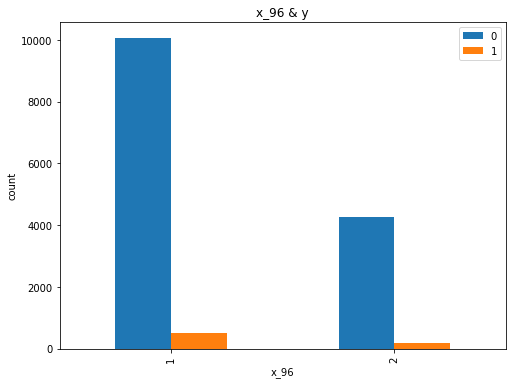

****************************************************
x_102
-99    14999
 2         1
Name: x_102, dtype: int64
y          0    1
x_102            
-99    14308  691
 2         1    0


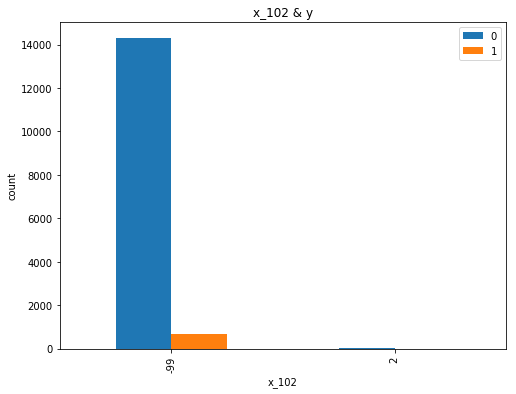

****************************************************
x_107
-99    14998
 0         2
Name: x_107, dtype: int64
y          0    1
x_107            
-99    14307  691
 0         2    0


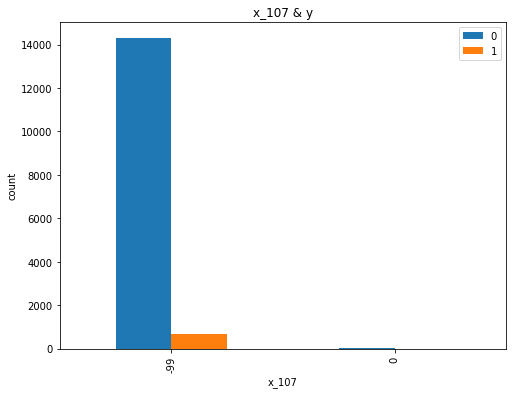

****************************************************
x_110
-99    15000
Name: x_110, dtype: int64
y          0    1
x_110            
-99    14309  691


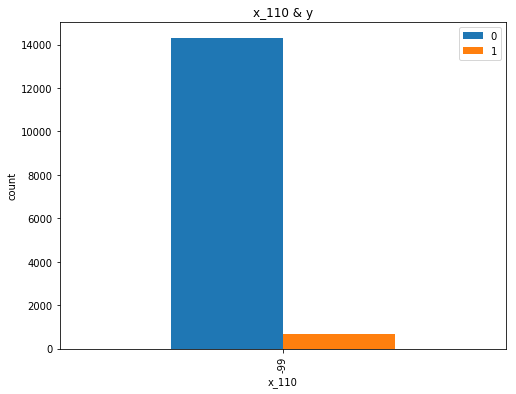

****************************************************
x_112
-99    15000
Name: x_112, dtype: int64
y          0    1
x_112            
-99    14309  691


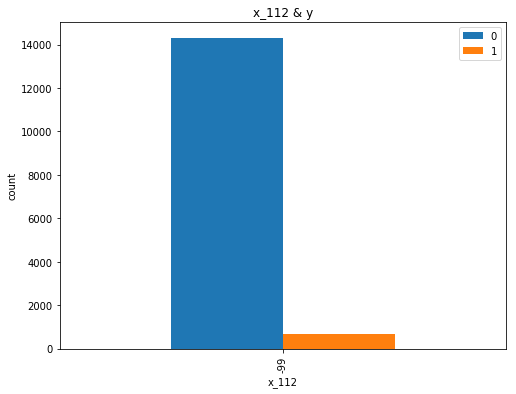

****************************************************
x_113
-99    14999
 0         1
Name: x_113, dtype: int64
y          0    1
x_113            
-99    14308  691
 0         1    0


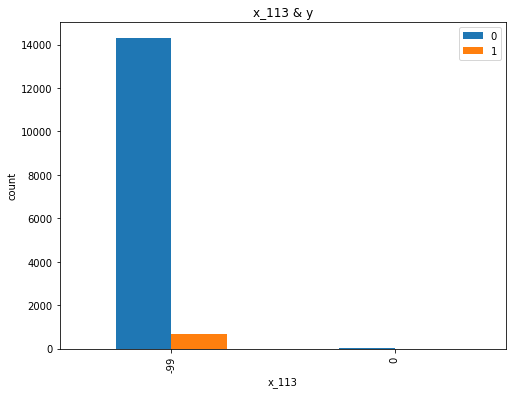

****************************************************
x_114
-99    14999
 2         1
Name: x_114, dtype: int64
y          0    1
x_114            
-99    14308  691
 2         1    0


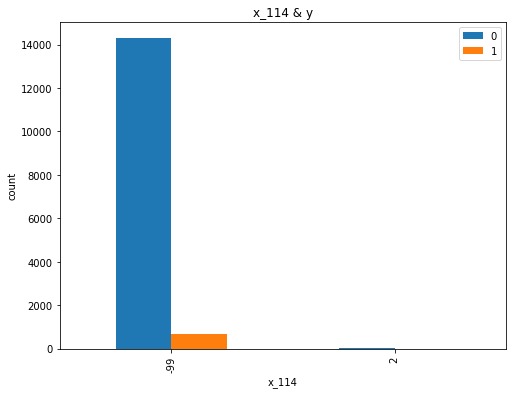

****************************************************
x_116
-99    15000
Name: x_116, dtype: int64
y          0    1
x_116            
-99    14309  691


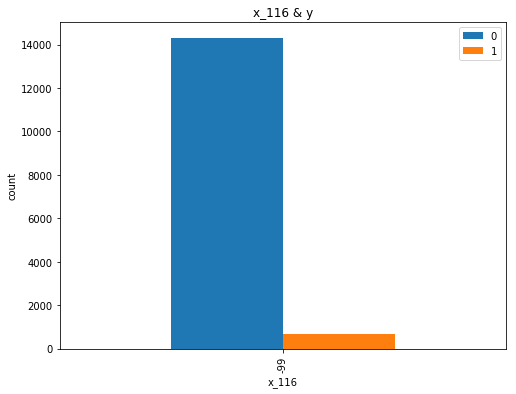

****************************************************
x_118
-99    14999
 0         1
Name: x_118, dtype: int64
y          0    1
x_118            
-99    14308  691
 0         1    0


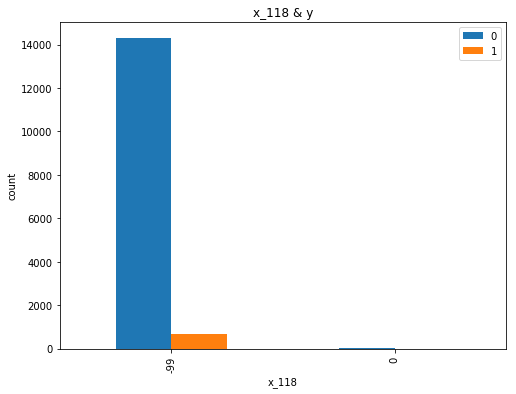

****************************************************
x_126
-99    14999
 1         1
Name: x_126, dtype: int64
y          0    1
x_126            
-99    14308  691
 1         1    0


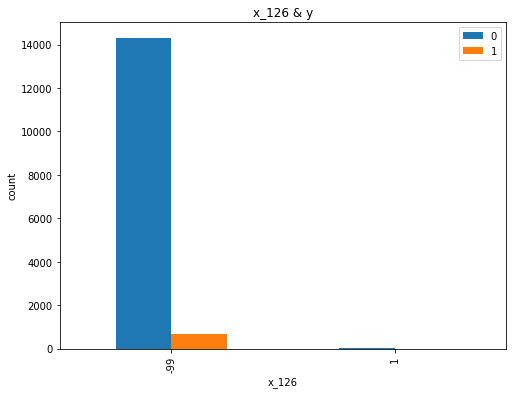

****************************************************
x_129
-99    15000
Name: x_129, dtype: int64
y          0    1
x_129            
-99    14309  691


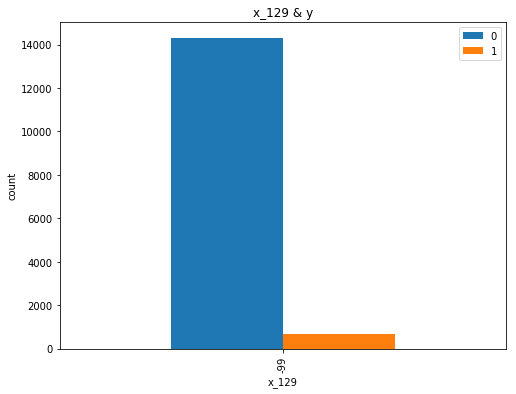

****************************************************
x_131
-99    14999
 0         1
Name: x_131, dtype: int64
y          0    1
x_131            
-99    14308  691
 0         1    0


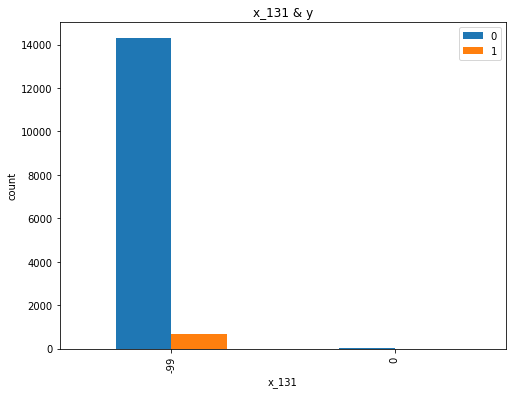

****************************************************
x_132
-99    15000
Name: x_132, dtype: int64
y          0    1
x_132            
-99    14309  691


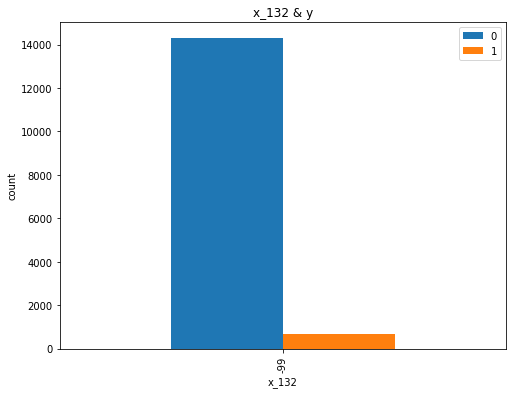

****************************************************
x_133
-99    14999
 2         1
Name: x_133, dtype: int64
y          0    1
x_133            
-99    14308  691
 2         1    0


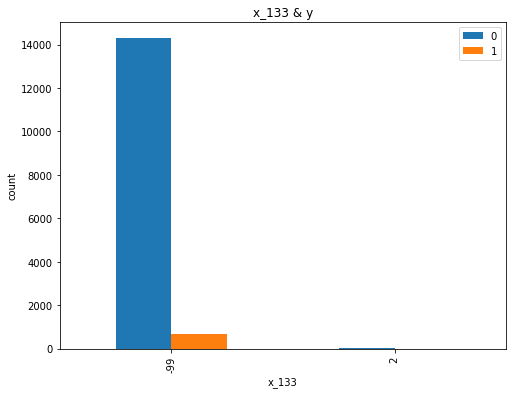

****************************************************
x_134
-99    15000
Name: x_134, dtype: int64
y          0    1
x_134            
-99    14309  691


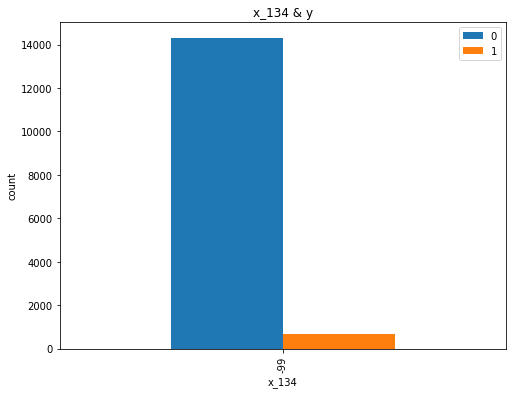

****************************************************
x_135
-99    14999
 2         1
Name: x_135, dtype: int64
y          0    1
x_135            
-99    14308  691
 2         1    0


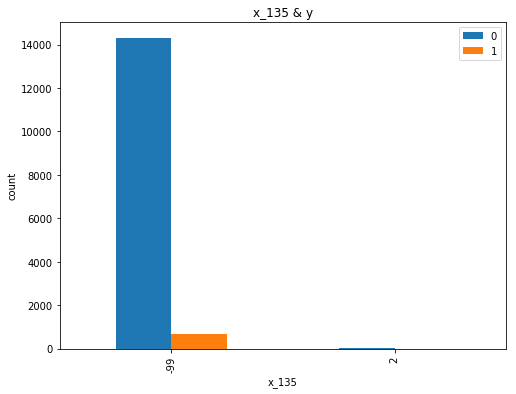

****************************************************
x_137
-99    14999
 2         1
Name: x_137, dtype: int64
y          0    1
x_137            
-99    14308  691
 2         1    0


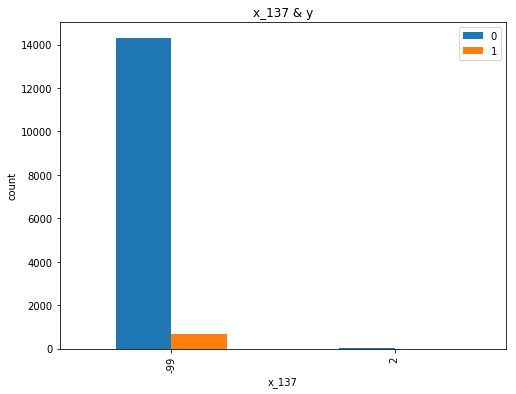

****************************************************
x_138
-99    14999
 1         1
Name: x_138, dtype: int64
y          0    1
x_138            
-99    14308  691
 1         1    0


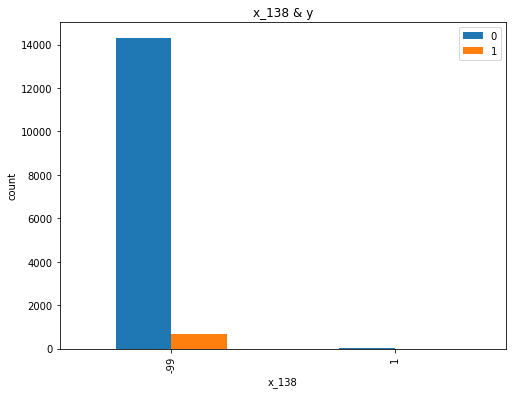

****************************************************
x_151
 1     14954
-99       46
Name: x_151, dtype: int64
y          0    1
x_151            
-99       44    2
 1     14265  689


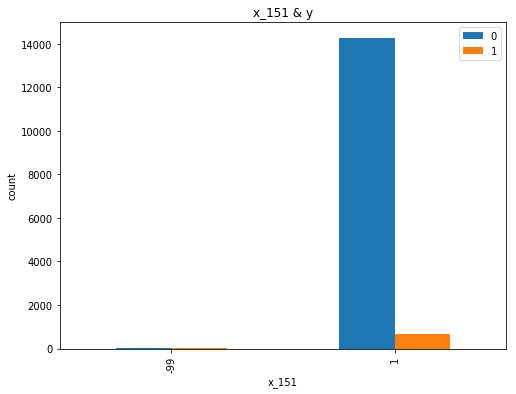

In [30]:
for feat in one_value_feats:
    print('****************************************************')
    print(feat)
    print(train_xy[feat].value_counts())
    df = pd.crosstab(train_xy[feat],train_xy['y'])
    print(df)
    df.plot(kind='bar',figsize = (8,6))
    plt.xlabel(feat)
    plt.ylabel('count')
    plt.title(feat+' & '+'y')
    plt.legend(loc = 'best')
    plt.show()
'''
# 数值型特征
x_6特征正常，虽然只有0 + nan,但是分布大体一致
x_12同上
x_18 == x_6 == x_28
x_23 == x_12 == x_34

x_92 =0 ，y=0
x_94 == x_92
--------------------------------------------------
# 类别特征
x_96 = 1,2 没有nan

x_113 = 0,y=0,只有一个样本  == x_118 == x_131
x_126 = 1,y=0,只有一个样本  == x_102 == x_138
x_102 = 2,y=0,只有一个样本  == x_133  == x_135 == x_137 == x_114
x_107 = 0,y=0,只有两个样本

x_116 == x_112  == x_110 == x_129 == x_132 ==x_134 全部nan

x_151 大部分是1，缺失值不多，44/46个nan = 0
'''


这样的特征观察，是为了发现一些特征是否有特别情况，就是其对应的类别分布不一样，这里面则必有其含义。

In [ ]:
# ----------------------------------------------------------------------

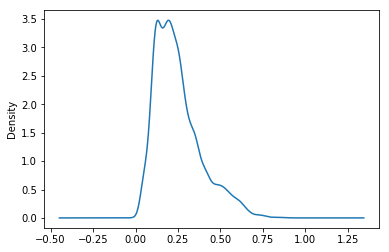

In [32]:
# 现在看看一些重要的特征
train['x_1'].plot(kind = 'kde') # float

cust_group
group_1    AxesSubplot(0.125,0.125;0.775x0.755)
group_2    AxesSubplot(0.125,0.125;0.775x0.755)
group_3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: x_1, dtype: object

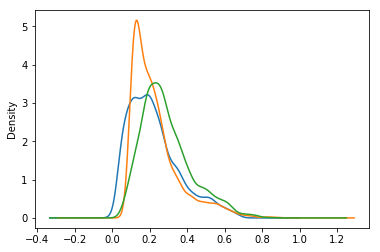

In [20]:
train['x_1'].groupby(train['cust_group']).plot(kind = 'kde')

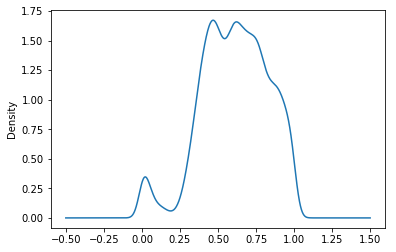

In [33]:
train['x_2'].plot(kind = 'kde')

In [24]:
train['x_2'].groupby(train['cust_group']).describe()

,count,mean,std,min,25%,50%,75%,max
cust_group,,,,,,,,
group_1,5000.0,0.631111,0.218640,0.000127,0.480120,0.641421,0.809076,0.999979
group_2,5000.0,0.557430,0.233901,0.000000,0.424331,0.554951,0.733281,0.999958
group_3,5000.0,0.640756,0.194456,0.000407,0.490099,0.647683,0.778697,0.999992


cust_group
group_1    AxesSubplot(0.125,0.125;0.775x0.755)
group_2    AxesSubplot(0.125,0.125;0.775x0.755)
group_3    AxesSubplot(0.125,0.125;0.775x0.755)
Name: x_2, dtype: object

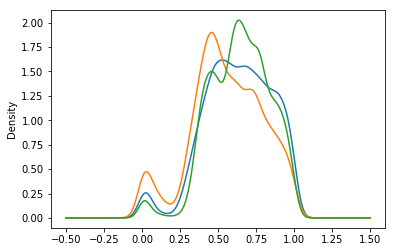

In [21]:
train['x_2'].groupby(train['cust_group']).plot(kind = 'kde')

In [8]:
train[['x_1','x_2','x_80','x_81','x_95']].describe()

,x_1,x_2,x_80,x_81,x_95
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,0.247907,0.609766,0.773244,-0.060300,-17.625106
std,0.136649,0.219441,0.093250,9.809523,38.248066
min,0.000000,0.000000,0.000000,-99.000000,-99.000000
25%,0.145833,0.467884,0.732394,0.889292,0.106383
50%,0.208333,0.612299,0.769953,0.918330,0.255319
75%,0.312500,0.773963,0.821596,0.945554,0.436170
max,0.895833,0.999992,1.000000,1.000000,1.000000


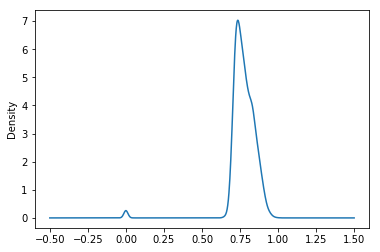

In [34]:
train['x_80'].plot(kind = 'kde')

In [37]:
train.loc[train['x_80']==0,'y'].value_counts().sort_index() # 看看x_80 = 0 的预测值y

0    128
1      5
Name: y, dtype: int64

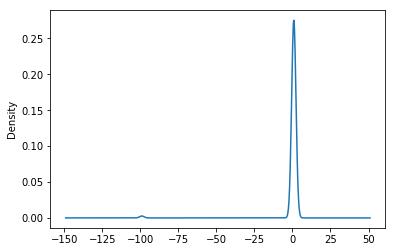

In [38]:
train['x_81'].plot(kind = 'kde')

In [22]:
train.loc[train['x_81']==-99,'cust_group'].value_counts().sort_index() # 看看x_80 = -99 的预测值y,有缺失值nan

group_1    133
group_2      1
group_3     12
Name: cust_group, dtype: int64

In [23]:
train.loc[train['x_81']==-99,'y'].value_counts().sort_index() # 看看x_80 = -99 的预测值y,有缺失值nan

0    128
1     18
Name: y, dtype: int64

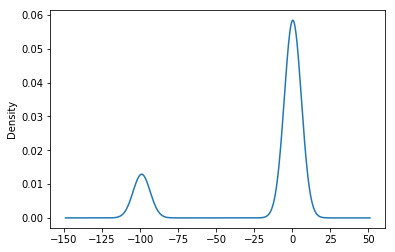

In [42]:
train['x_95'].plot(kind = 'kde')

In [43]:
train.loc[train['x_95']==-99,'y'].value_counts().sort_index() # 看看x_95 = -99 的预测值y,有缺失值nan

0    2448
1     266
Name: y, dtype: int64

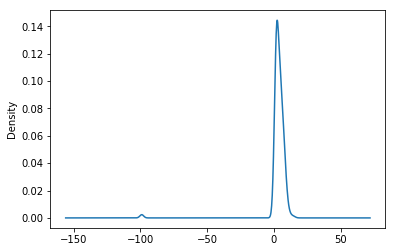

In [45]:
train['x_52'].plot(kind = 'kde')

In [48]:
train.loc[train['x_52']==-99,'y'].value_counts().sort_index() # 看看x_52 = -99 的预测值y,有缺失值nan

0    123
1      5
Name: y, dtype: int64

In [51]:
train['x_52'].describe()

count    15000.000000
mean         3.150000
std          9.813286
min        -99.000000
25%          2.000000
50%          3.000000
75%          6.000000
max         15.000000
Name: x_52, dtype: float64

In [52]:
train['x_63'].describe()

count    15000.000000
mean         1.081600
std          9.338306
min        -99.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          5.000000
Name: x_63, dtype: float64

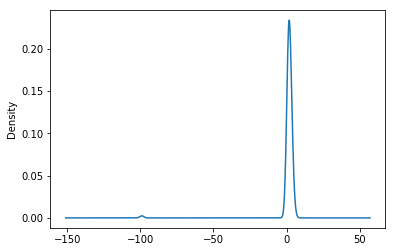

In [47]:
train['x_63'].plot(kind = 'kde')

In [50]:
train.loc[train['x_63']==-99,'y'].value_counts().sort_index() # 看看x_63 = -99 的预测值y,有缺失值nan

0    123
1      5
Name: y, dtype: int64

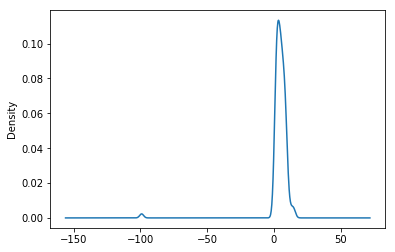

In [46]:
train['x_54'].plot(kind = 'kde')

In [53]:
train['x_54'].describe()

count    15000.000000
mean         4.348467
std         10.052020
min        -99.000000
25%          3.000000
50%          5.000000
75%          7.000000
max         15.000000
Name: x_54, dtype: float64

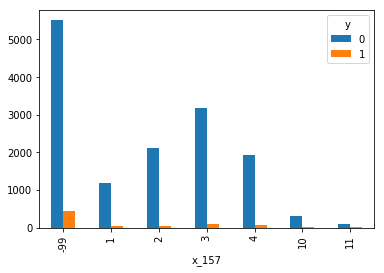

In [54]:
# 看看重要性很高的类别特征
pd.crosstab(train['x_157'],train['y']).plot(kind = 'bar')

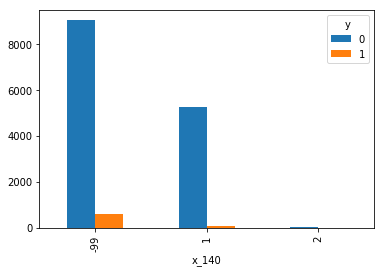

In [55]:
pd.crosstab(train['x_140'],train['y']).plot(kind = 'bar')

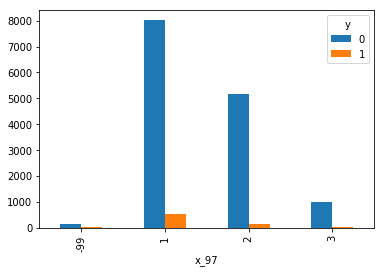

In [40]:
pd.crosstab(train['x_97'],train['y']).plot(kind = 'bar')

In [11]:
# 看看一些重要性 = 0的，但是没删除的特征
#----------------------------------------------
train['x_11'].describe()

count    15000.000000
mean       -48.360200
std         49.606763
min        -99.000000
25%        -99.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: x_11, dtype: float64

In [13]:
train['x_11'].value_counts()

-99    7345
 0     6141
 1     1306
 2      180
 3       26
 4        2
Name: x_11, dtype: int64

In [14]:
train['x_12'].value_counts()

 0     7655
-99    7345
Name: x_12, dtype: int64

In [12]:
train['x_12'].describe()

count    15000.000000
mean       -48.477000
std         49.491078
min        -99.000000
25%        -99.000000
50%          0.000000
75%          0.000000
max          0.000000
Name: x_12, dtype: float64

In [15]:
# -------------------------------
train['x_70'].value_counts()

 1     14810
-99      128
 2        33
 0        21
 5         3
 6         2
 4         2
 9         1
Name: x_70, dtype: int64

In [17]:
train['x_71'].value_counts()

 1     14810
-99      128
 0        21
 2        18
 3        17
 5         2
 4         2
 7         1
 6         1
Name: x_71, dtype: int64

In [18]:
# ----------------------------
print(train['x_145'].value_counts())
print(train['x_146'].value_counts())
print(train['x_147'].value_counts())
print(train['x_148'].value_counts())
print(train['x_149'].value_counts())

 1     14866
 2        88
-99       46
Name: x_145, dtype: int64
 1     14756
 2       198
-99       46
Name: x_146, dtype: int64
 1     14756
 2       160
-99       46
 4        38
Name: x_147, dtype: int64
 1     14756
 2       105
 3        93
-99       46
Name: x_148, dtype: int64
 1     14601
 3       330
-99       46
 4        23
Name: x_149, dtype: int64


In [19]:
# ----------------------------
print(train['x_151'].value_counts())
print(train['x_152'].value_counts())


 1     14954
-99       46
Name: x_151, dtype: int64
 1     14952
-99       46
 2         2
Name: x_152, dtype: int64


In [35]:
train['x_96'].value_counts()

1    10572
2     4428
Name: x_96, dtype: int64

In [36]:
train['x_97'].value_counts()

 1     8543
 2     5293
 3     1015
-99     149
Name: x_97, dtype: int64

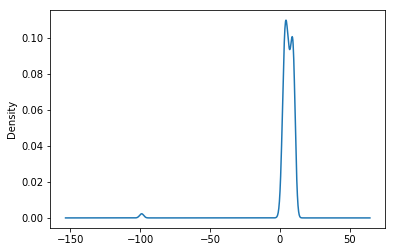

In [40]:
# 'x_80','x_2','x_81','x_95','x_1','x_52','x_63','x_54','x_43'
train['x_43'].plot(kind = 'kde')
#plt.plot(train['x_2'][:1000])